# Análisis Exploratorio de Datos (EDA)
## Tasas de Interés Activas por Tipo de Crédito - Histórico

**Autores:** Gia Mariana Calle Higuita - José Santiago Molano Perdomo - Juan José Restrepo Higuita

**Fecha:** 30 de enero de 2026

**Dataset:** Seleccionamos este conjunto de datos llamado [Tasas de interés activas por tipo de crédito - Histórico](https://www.datos.gov.co/d/w9zh-vetq) de la página de [Datos Abiertos de Colombia](https://www.datos.gov.co/browse?sortBy=newest&pageSize=20&page=1). Este es un gran conjunto de datos (67.630.338 filas), por lo que se aplicó un filtro antes de la exportación del archivo CSV. El filtro aplicado se realizó con la columna de fecha, para solamente exportar los datos entre 30 de noviembre de 2015 y el 30 de noviembre de 2025, para hacer un análisis de la última década. Pero al ejecutar varios de los análisis, nos dimos cuenta de que los datos están como desde julio de 2022 hasta agosto de 2025, pero no era posible saberlo con claridad ya que la información sobre el dataset dice: _"Este conjunto de datos contiene la información histórica desde la fecha de inicio de la serie hasta dos meses antes de la fecha de corte actual"._

Debido a que el archivo es tan grande, no fue posible cargarlo al repositorio, ni siquiera con Git LFS. Si desea acceder a él, puede descargarlo [aquí](https://drive.google.com/file/d/1vum2rau0RXl4wTvQeBTSfuhGZE4ZtgT-/view).

**Uso de modelos de inteligencia artificial:** Para este EDA, nos apoyamos en el modelo Claude Sonnet 4.5.

---

##  FASE 1: BUSINESS UNDERSTANDING (CRISP-DM)

### Contexto del Negocio

El dataset contiene información histórica sobre las tasas de interés activas otorgadas por diferentes entidades financieras en Colombia. Este análisis nos podría ayudar a entender algunas de las siguientes preguntas:

1. **Análisis de competitividad:** ¿Cómo se posicionan las diferentes entidades bancarias en términos de tasas de interés?
2. **Segmentación de cercado:** ¿Existen diferencias significativas en las tasas según el tipo de persona, sexo, o tamaño de empresa?
3. **Identificación de patrones:** ¿Qué factores influyen más en las tasas de interés ofrecidas?
4. **Análisis temporal:** ¿Cómo han evolucionado las tasas de interés en el tiempo?
5. **Acceso al crédito:** ¿Existen brechas de género, étnicas o por tipo de empresa en el acceso y condiciones crediticias?

**Competitividad y posicionamiento:**
- ¿Qué entidades financieras ofrecen las tasas más competitivas por tipo de crédito?
- ¿Cuál es el spread (diferencia) entre las tasas más altas y más bajas del mercado?
- ¿Qué bancos lideran en volumen de desembolsos vs. tasas competitivas?

**Segmentación y discriminación:**
- ¿Existen diferencias significativas en las tasas de interés entre hombres y mujeres?
- ¿Las personas jurídicas obtienen mejores tasas que las personas naturales?
- ¿Cómo varían las tasas según el tamaño de la empresa (micro, pequeña, mediana, gran empresa)?
- ¿Hay diferencias en las condiciones crediticias por grupo étnico?

**Productos y garantías:**
- ¿Qué tipos de crédito tienen las tasas más altas/bajas?
- ¿Cómo impacta el tipo de garantía en la tasa de interés?
- ¿Qué relación existe entre el plazo del crédito y la tasa de interés?

**Volumen y concentración:**
- ¿Dónde se concentra el mayor volumen de desembolsos?
- ¿Cuál es la relación entre monto promedio del crédito y tasa de interés?
- ¿Qué sectores económicos (CIIU) reciben más crédito y a qué tasas?

**Riesgo y antigüedad:**
- ¿Cómo afecta la antigüedad de la empresa a las tasas ofrecidas?
- ¿Existe correlación entre la clase de deudor y las condiciones del crédito?
- ¿Los deudores nuevos pagan tasas más altas?

**Análisis geográfico:**
- ¿Hay diferencias regionales en las tasas de interés?
- ¿Qué municipios tienen mejor acceso a crédito competitivo?

---

##  FASE 2: OBTAIN - OBTENCIÓN DE DATOS (OSEMN)

### Carga de Librerías y Datos

In [1]:
# Instalación de librerías necesarias
import sys
import subprocess

def install_package(package):
    """Instala un paquete si no está disponible"""
    try:
        __import__(package.split('[')[0])  # Manejar nombres como 'package[extra]'
    except ImportError:
        print(f"Instalando {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--break-system-packages", "-q"])
        print(f" {package} instalado correctamente")

# Instalar librerías necesarias
packages = ['plotly', 'scipy']
for pkg in packages:
    install_package(pkg)

In [2]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Intentar importar plotly (opcional)
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    PLOTLY_AVAILABLE = True
except ImportError:
    PLOTLY_AVAILABLE = False
    print(" Plotly no disponible, se usarán solo gráficos de matplotlib/seaborn")

# Librerías para análisis estadístico
from scipy import stats
from scipy.stats import chi2_contingency, f_oneway, normaltest

# Configuración de warnings
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        pass  # Usar estilo por defecto
    
sns.set_palette("husl")
%matplotlib inline

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
# Cargar el dataset
df = pd.read_csv('datasets/interest-rates_credit-type.csv', 
                 sep=',',
                 encoding='utf-8',
                 decimal=',',
                 thousands='.',
                 nrows=13175571)  # Cargar todas menos la última fila (da problemas ¬_¬)

print("Dataset cargado exitosamente")
print(f"Dimensiones del dataset: {df.shape[0]:,} filas x {df.shape[1]} columnas")

Dataset cargado exitosamente
Dimensiones del dataset: 13,175,571 filas x 23 columnas


### Vista Preliminar de los Datos

In [4]:
# Primeras filas del dataset
print("\n PRIMERAS 5 FILAS DEL DATASET:")
print("="*100)
df.head()


 PRIMERAS 5 FILAS DEL DATASET:


,Tipo_Entidad,Nombre_Tipo_Entidad,Codigo_Entidad,Nombre_Entidad,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,Producto de crédito,Plazo de crédito,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Grupo_Etnico,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio
0,1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,23/08/2024,Natural,Masculino,No aplica,Consumo,Garantia idónea o no idónea,Tarjeta de crédito para ingresos superiores a ...,Consumos entre 7 y 12 meses,29.20,0.00,382200.00,1,Ningún grupo étnico,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,10.00,68655.00
1,1,BC-ESTABLECIMIENTO BANCARIO,39,Banco Davivienda,09/08/2024,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos hasta 2 SMMLV,Consumos a un mes,0.00,0.00,210484.66,7,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,4799.00,25473.00
2,1,BC-ESTABLECIMIENTO BANCARIO,30,Banco Caja Social S.A.,17/01/2025,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos entre 2 y 6 meses,22.85,0.00,389900.00,1,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,8692.00,76001.00
3,4,CF-COMPAÑÍA DE FINANCIAMIENTO,128,Nu Colombia C.F.,28/02/2025,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos entre 2 y 6 meses,26.20,0.00,288435.00,2,Ningún grupo étnico,No aplica(1),FS,Hasta 1 SMLMV,Deudor nuevo en la entidad,20.00,76606.00
4,1,BC-ESTABLECIMIENTO BANCARIO,2,Banco Popular,08/11/2024,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a un mes,0.00,0.00,184150.00,1,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,4723.00,68276.00


In [5]:
# Últimas filas del dataset
print("\n ÚLTIMAS 5 FILAS DEL DATASET:")
print("="*100)
df.tail()


 ÚLTIMAS 5 FILAS DEL DATASET:


,Tipo_Entidad,Nombre_Tipo_Entidad,Codigo_Entidad,Nombre_Entidad,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,Producto de crédito,Plazo de crédito,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Grupo_Etnico,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio
13175566,1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,16/05/2025,Natural,Femenino,No aplica,Consumo,Garantia idónea o no idónea,Tarjeta de crédito para ingresos superiores a ...,Consumos a un mes,0.00,0.00,1970572.00,6,Sin información (1),No aplica(1),FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,5519.00,66001.00
13175567,1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,30/05/2025,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a un mes,0.00,0.00,233820.00,4,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,8551.00,68001.00
13175568,1,BC-ESTABLECIMIENTO BANCARIO,49,AV Villas,23/05/2025,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos entre 2 y 6 meses,25.48,0.00,5308372.00,25,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor nuevo en la entidad,90.00,11001.00
13175569,4,CF-COMPAÑÍA DE FINANCIAMIENTO,128,Nu Colombia C.F.,16/05/2025,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos hasta 2 SMMLV,Avances en efectivo,25.57,0.00,2400000.00,4,Ningún grupo étnico,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,4610.00,76834.00
13175570,4,CF-COMPAÑÍA DE FINANCIAMIENTO,128,Nu Colombia C.F.,23/05/2025,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos hasta 2 SMMLV,Avances en efectivo,25.57,0.00,660000.00,2,Ningún grupo étnico,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,10.00,68432.00


In [6]:
# Muestra aleatoria
print("\n MUESTRA ALEATORIA DE 10 FILAS:")
print("="*100)
df.sample(10, random_state=42)


 MUESTRA ALEATORIA DE 10 FILAS:


,Tipo_Entidad,Nombre_Tipo_Entidad,Codigo_Entidad,Nombre_Entidad,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,Producto de crédito,Plazo de crédito,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Grupo_Etnico,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio
12256018,1,BC-ESTABLECIMIENTO BANCARIO,1,Banco de Bogotá,09/05/2025,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a un mes,0.00,0.00,542400.00,1,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor nuevo en la entidad,4643.00,27001.00
11585192,1,BC-ESTABLECIMIENTO BANCARIO,39,Banco Davivienda,02/05/2025,Natural,Masculino,No aplica,Consumo,Sin garantia,Consumo otros,Entre 31 días y 1 año,15.10,0.00,24858105.00,2,Sin información (1),No aplica(1),FS,Mayor a 6 SMLMV menor o igual a 12 SMLMV,Deudor nuevo en la entidad,10.00,5001.00
11060027,1,BC-ESTABLECIMIENTO BANCARIO,30,Banco Caja Social S.A.,25/04/2025,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a un mes,23.14,0.00,40675.00,3,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,10.00,52838.00
5469835,1,BC-ESTABLECIMIENTO BANCARIO,39,Banco Davivienda,25/10/2024,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos entre 2 y 6 meses,27.87,0.00,615400.00,2,Sin información (1),No aplica(1),FS,Hasta 1 SMLMV,Deudor nuevo en la entidad,7410.00,76001.00
6397706,1,BC-ESTABLECIMIENTO BANCARIO,54,Bancoomeva,18/10/2024,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Sin garantia,Sobregiro en cuenta corriente persona jurídica...,Hasta 30 días,26.17,0.00,4077669.00,1,No aplica,más de 5 y hasta 10 años,FS,Mayor a 3 SMLMV y menor o igual a 5 SMLMV,Deudor de la entidad,5630.00,76001.00
7405155,1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,21/03/2025,Jurídica,No aplica,Pequeña empresa,Comercial ordinario,Garantia idónea o no idónea,Tarjeta de crédito empresarial,Avances en efectivo,24.86,0.00,1000000.00,1,No aplica,más de 10 años,FS,Hasta 1 SMLMV,Deudor de la entidad,2410.00,5001.00
667297,4,CF-COMPAÑÍA DE FINANCIAMIENTO,128,Nu Colombia C.F.,20/12/2024,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a un mes,26.20,0.00,700000.00,1,Ningún grupo étnico,No aplica(1),FS,Hasta 1 SMLMV,Deudor nuevo en la entidad,8621.00,25430.00
4412064,1,BC-ESTABLECIMIENTO BANCARIO,7,Bancolombia,07/03/2025,Jurídica,No aplica,Gran empresa,Comercial ordinario,Garantia idónea o no idónea,Tarjeta de crédito empresarial,Consumos a un mes,0.00,0.00,58740963.00,3,No aplica,más de 5 y hasta 10 años,FS,Mayor a 20 SMLMV,Deudor de la entidad,1011.00,5001.00
1512850,1,BC-ESTABLECIMIENTO BANCARIO,43,Banagrario,13/12/2024,Natural,Masculino,Microempresa,Crédito productivo,Garantía del fondo agropecuario de garantías (...,Crédito popular productivo urbano (con recurs...,Más de 1 año y hasta 3 años,16.35,6.70,6700000.00,1,Sin información (1),más de 10 años,IB3,Mayor a 5 SMLMV y menor o igual a 6 SMLMV,Deudor de la entidad,150.00,52083.00
5978156,1,BC-ESTABLECIMIENTO BANCARIO,43,Banagrario,21/02/2025,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a un mes,0.00,0.00,2864800.00,1,Sin información (1),No aplica(1),FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,150.00,68190.00


---

##  FASE 3: SCRUB - LIMPIEZA Y PREPARACIÓN DE DATOS (OSEMN)

### Data Understanding (CRISP-DM)

In [7]:
# Información general del dataset
print("\n INFORMACIÓN GENERAL DEL DATASET:")
print("="*100)
df.info()


 INFORMACIÓN GENERAL DEL DATASET:
<class 'pandas.DataFrame'>
RangeIndex: 13175571 entries, 0 to 13175570
Data columns (total 23 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Tipo_Entidad                      int64  
 1   Nombre_Tipo_Entidad               str    
 2   Codigo_Entidad                    int64  
 3   Nombre_Entidad                    str    
 4   Fecha_Corte                       str    
 5   Tipo_de_persona                   str    
 6   Sexo                              str    
 7   Tamaño_de_empresa                 str    
 8   Tipo_de_crédito                   str    
 9   Tipo_de_garantía                  str    
 10  Producto de crédito               str    
 11  Plazo de crédito                  str    
 12  Tasa_efectiva_promedio_ponderada  float64
 13  margen_adicional                  float64
 14  Montos_desembolsados              float64
 15  Numero_de_creditos_desembolsados  int64  
 16  Grupo_Etni

In [8]:
# Tipos de datos
print("\n TIPOS DE DATOS POR COLUMNA:")
print("="*100)
tipos_datos = pd.DataFrame({
    'Columna': df.columns,
    'Tipo_Dato': df.dtypes.values,
    'No_Nulos': df.count().values,
    'Valores_Nulos': df.isnull().sum().values,
    '%_Nulos': (df.isnull().sum().values / len(df) * 100).round(2)
})
tipos_datos


 TIPOS DE DATOS POR COLUMNA:


,Columna,Tipo_Dato,No_Nulos,Valores_Nulos,%_Nulos
0,Tipo_Entidad,int64,13175571,0,0.00
1,Nombre_Tipo_Entidad,str,13175571,0,0.00
2,Codigo_Entidad,int64,13175571,0,0.00
3,Nombre_Entidad,str,13175571,0,0.00
4,Fecha_Corte,str,13175571,0,0.00
5,Tipo_de_persona,str,13175571,0,0.00
6,Sexo,str,13175571,0,0.00
7,Tamaño_de_empresa,str,13175571,0,0.00
8,Tipo_de_crédito,str,13175571,0,0.00
9,Tipo_de_garantía,str,13175571,0,0.00


### Limpieza de Nombres de Columnas

In [9]:
# Limpiar nombres de columnas (eliminar espacios, caracteres especiales)
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('á', 'a').str.replace('é', 'e').str.replace('í', 'i').str.replace('ó', 'o').str.replace('ú', 'u')

print("\n Nombres de columnas limpiados:")
print(df.columns.tolist())


 Nombres de columnas limpiados:
['Tipo_Entidad', 'Nombre_Tipo_Entidad', 'Codigo_Entidad', 'Nombre_Entidad', 'Fecha_Corte', 'Tipo_de_persona', 'Sexo', 'Tamaño_de_empresa', 'Tipo_de_credito', 'Tipo_de_garantia', 'Producto_de_credito', 'Plazo_de_credito', 'Tasa_efectiva_promedio_ponderada', 'margen_adicional', 'Montos_desembolsados', 'Numero_de_creditos_desembolsados', 'Grupo_Etnico', 'Antiguedad_de_la_empresa', 'Tipo_de_Tasa', 'Rango_monto_desembolsado', 'Clase_deudor', 'Codigo_CIIU', 'Codigo_Municipio']


### Conversión de Tipos de Datos

In [10]:
# Convertir Fecha_Corte a datetime si existe
if 'Fecha_Corte' in df.columns:
    df['Fecha_Corte'] = pd.to_datetime(df['Fecha_Corte'], dayfirst=True, errors='coerce')
    print(" Columna 'Fecha_Corte' convertida a datetime")
    
    # Extraer componentes de fecha
    df['Año'] = df['Fecha_Corte'].dt.year
    df['Mes'] = df['Fecha_Corte'].dt.month
    df['Trimestre'] = df['Fecha_Corte'].dt.quarter
    df['Año_Mes'] = df['Fecha_Corte'].dt.to_period('M').astype(str)
    print(" Variables temporales creadas: Año, Mes, Trimestre, Año_Mes")

 Columna 'Fecha_Corte' convertida a datetime
 Variables temporales creadas: Año, Mes, Trimestre, Año_Mes


In [11]:
# Limpiar espacios en blanco en columnas de texto
columnas_texto = df.select_dtypes(include=['object']).columns

for col in columnas_texto:
    df[col] = df[col].astype(str).str.strip()

print(f" Espacios en blanco eliminados de {len(columnas_texto)} columnas de texto")

 Espacios en blanco eliminados de 15 columnas de texto


### Análisis de Valores Nulos

In [12]:
# Análisis detallado de valores nulos
print("\n ANÁLISIS DE VALORES NULOS:")
print("="*100)

nulos = pd.DataFrame({
    'Columna': df.columns,
    'Valores_Nulos': df.isnull().sum(),
    'Porcentaje_Nulos': (df.isnull().sum() / len(df) * 100).round(4)
}).sort_values('Valores_Nulos', ascending=False)

nulos_filtrado = nulos[nulos['Valores_Nulos'] > 0]

if len(nulos_filtrado) > 0:
    print(f"\n Se encontraron {len(nulos_filtrado)} columnas con valores nulos:\n")
    print(nulos_filtrado)
else:
    print("\n No se encontraron valores nulos en el dataset")


 ANÁLISIS DE VALORES NULOS:

 Se encontraron 8 columnas con valores nulos:

                                           Columna  Valores_Nulos  \
Grupo_Etnico                          Grupo_Etnico            911   
Tipo_de_Tasa                          Tipo_de_Tasa            911   
Antiguedad_de_la_empresa  Antiguedad_de_la_empresa            911   
Rango_monto_desembolsado  Rango_monto_desembolsado            911   
Clase_deudor                          Clase_deudor            911   
Codigo_CIIU                            Codigo_CIIU            911   
Codigo_Municipio                  Codigo_Municipio            911   
Producto_de_credito            Producto_de_credito              1   

                          Porcentaje_Nulos  
Grupo_Etnico                          0.01  
Tipo_de_Tasa                          0.01  
Antiguedad_de_la_empresa              0.01  
Rango_monto_desembolsado              0.01  
Clase_deudor                          0.01  
Codigo_CIIU                    

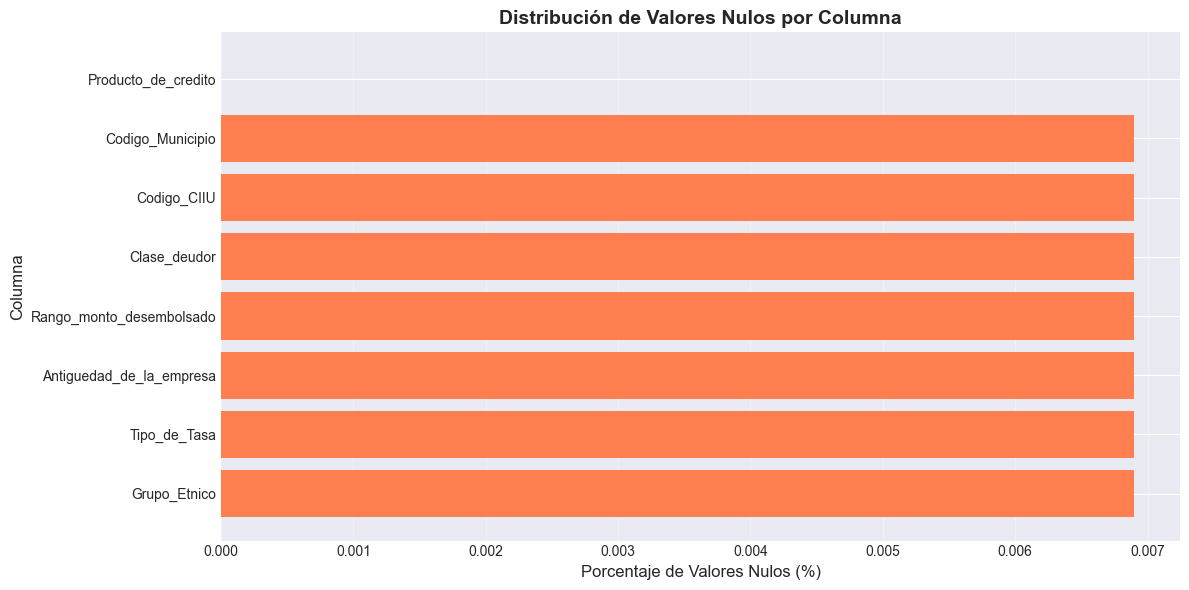

In [13]:
# Visualización de valores nulos
if len(nulos_filtrado) > 0:
    plt.figure(figsize=(12, 6))
    plt.barh(nulos_filtrado['Columna'], nulos_filtrado['Porcentaje_Nulos'], color='coral')
    plt.xlabel('Porcentaje de Valores Nulos (%)', fontsize=12)
    plt.ylabel('Columna', fontsize=12)
    plt.title('Distribución de Valores Nulos por Columna', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

### Análisis de Duplicados

In [14]:
# Verificar duplicados
duplicados_totales = df.duplicated().sum()
print(f"\n ANÁLISIS DE DUPLICADOS:")
print("="*100)
print(f"Total de filas duplicadas: {duplicados_totales:,} ({(duplicados_totales/len(df)*100):.2f}%)")

if duplicados_totales > 0:
    print(f"\n Se encontraron {duplicados_totales:,} filas duplicadas")
    print("\nEjemplo de duplicados:")
    print(df[df.duplicated(keep=False)].head(10))
else:
    print("\n No se encontraron filas duplicadas")


 ANÁLISIS DE DUPLICADOS:
Total de filas duplicadas: 0 (0.00%)

 No se encontraron filas duplicadas


---

##  FASE 4: EXPLORE - ANÁLISIS EXPLORATORIO (OSEMN)

### Data Preparation (CRISP-DM)

---

##  ANÁLISIS CUANTITATIVO

### Estadísticas Descriptivas - Variables Numéricas

In [15]:
# Identificar columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

# Eliminar columnas de código/ID si existen
columnas_numericas_analisis = [col for col in columnas_numericas if not any(x in col.lower() for x in ['codigo', 'tipo_entidad', 'año', 'mes', 'trimestre'])]

print(f"\n COLUMNAS NUMÉRICAS PARA ANÁLISIS: {len(columnas_numericas_analisis)}")
print(columnas_numericas_analisis)


 COLUMNAS NUMÉRICAS PARA ANÁLISIS: 4
['Tasa_efectiva_promedio_ponderada', 'margen_adicional', 'Montos_desembolsados', 'Numero_de_creditos_desembolsados']


In [16]:
# Estadísticas descriptivas completas
print("\n ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS:")
print("="*100)

estadisticas = df[columnas_numericas_analisis].describe().T
estadisticas['cv'] = (estadisticas['std'] / estadisticas['mean'] * 100).round(2)  # Coeficiente de variación
estadisticas['rango'] = estadisticas['max'] - estadisticas['min']
estadisticas['iqr'] = estadisticas['75%'] - estadisticas['25%']  # Rango intercuartílico

estadisticas


 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS:


,count,mean,std,min,25%,50%,75%,max,cv,rango,iqr
Tasa_efectiva_promedio_ponderada,13175571.00,20.24,13.95,0.00,11.93,24.89,25.95,88.90,68.92,88.90,14.02
margen_adicional,13175571.00,0.27,1.58,-12.00,0.00,0.00,0.00,27.51,595.66,39.51,0.00
Montos_desembolsados,13175571.00,32850675.41,1050288023.14,0.01,235000.00,1100000.00,4859000.00,1053820000000.00,3197.16,1053819999999.99,4624000.00
Numero_de_creditos_desembolsados,13175571.00,16.05,871.55,1.00,1.00,1.00,4.00,454929.00,5431.70,454928.00,3.00


### Interpretación de Estadísticas Descriptivas

**Las estadísticas descriptivas nos permiten entender:**

1. **Tasa_efectiva_promedio_ponderada:**
   - Central: Tasas promedio del mercado
   - Dispersión: Qué tan variables son las tasas entre diferentes créditos
   - Rango: Diferencia entre las tasas más bajas y más altas

2. **Montos_desembolsados:**
   - Media vs Mediana: Indica si hay créditos muy grandes que sesgan el promedio
   - CV alto: Gran variabilidad en los montos (desde microcréditos hasta grandes empresas)

3. **Numero_de_creditos_desembolsados:**
   - Concentración: ¿Pocos créditos grandes o muchos pequeños?
   - Mediana: Valor típico de créditos por registro

4. **margen_adicional:**
   - Cuánto margen adicional cobran las entidades
   - Qué proporción de registros tiene margen adicional

In [17]:
# Análisis de asimetría y curtosis
print("\n ANÁLISIS DE FORMA DE LA DISTRIBUCIÓN:")
print("="*100)

forma_distribucion = pd.DataFrame({
    'Variable': columnas_numericas_analisis,
    'Asimetría': [df[col].skew() for col in columnas_numericas_analisis],
    'Curtosis': [df[col].kurtosis() for col in columnas_numericas_analisis]
})

forma_distribucion['Interpretación_Asimetría'] = forma_distribucion['Asimetría'].apply(
    lambda x: 'Simétrica' if abs(x) < 0.5 else ('Asimétrica derecha' if x > 0 else 'Asimétrica izquierda')
)

forma_distribucion['Interpretación_Curtosis'] = forma_distribucion['Curtosis'].apply(
    lambda x: 'Normal' if abs(x) < 1 else ('Leptocúrtica (picos altos)' if x > 1 else 'Platicúrtica (picos bajos)')
)

forma_distribucion


 ANÁLISIS DE FORMA DE LA DISTRIBUCIÓN:


,Variable,Asimetría,Curtosis,Interpretación_Asimetría,Interpretación_Curtosis
0,Tasa_efectiva_promedio_ponderada,0.64,2.61,Asimétrica derecha,Leptocúrtica (picos altos)
1,margen_adicional,6.84,54.04,Asimétrica derecha,Leptocúrtica (picos altos)
2,Montos_desembolsados,304.15,190297.00,Asimétrica derecha,Leptocúrtica (picos altos)
3,Numero_de_creditos_desembolsados,300.98,114269.61,Asimétrica derecha,Leptocúrtica (picos altos)


### Análisis de Correlaciones

In [18]:
# Matriz de correlación
print("\n MATRIZ DE CORRELACIÓN:")
print("="*100)

correlacion = df[columnas_numericas_analisis].corr()
correlacion


 MATRIZ DE CORRELACIÓN:


,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados
Tasa_efectiva_promedio_ponderada,1.00,-0.00,-0.01,-0.01
margen_adicional,-0.00,1.00,0.02,-0.00
Montos_desembolsados,-0.01,0.02,1.00,0.08
Numero_de_creditos_desembolsados,-0.01,-0.00,0.08,1.00


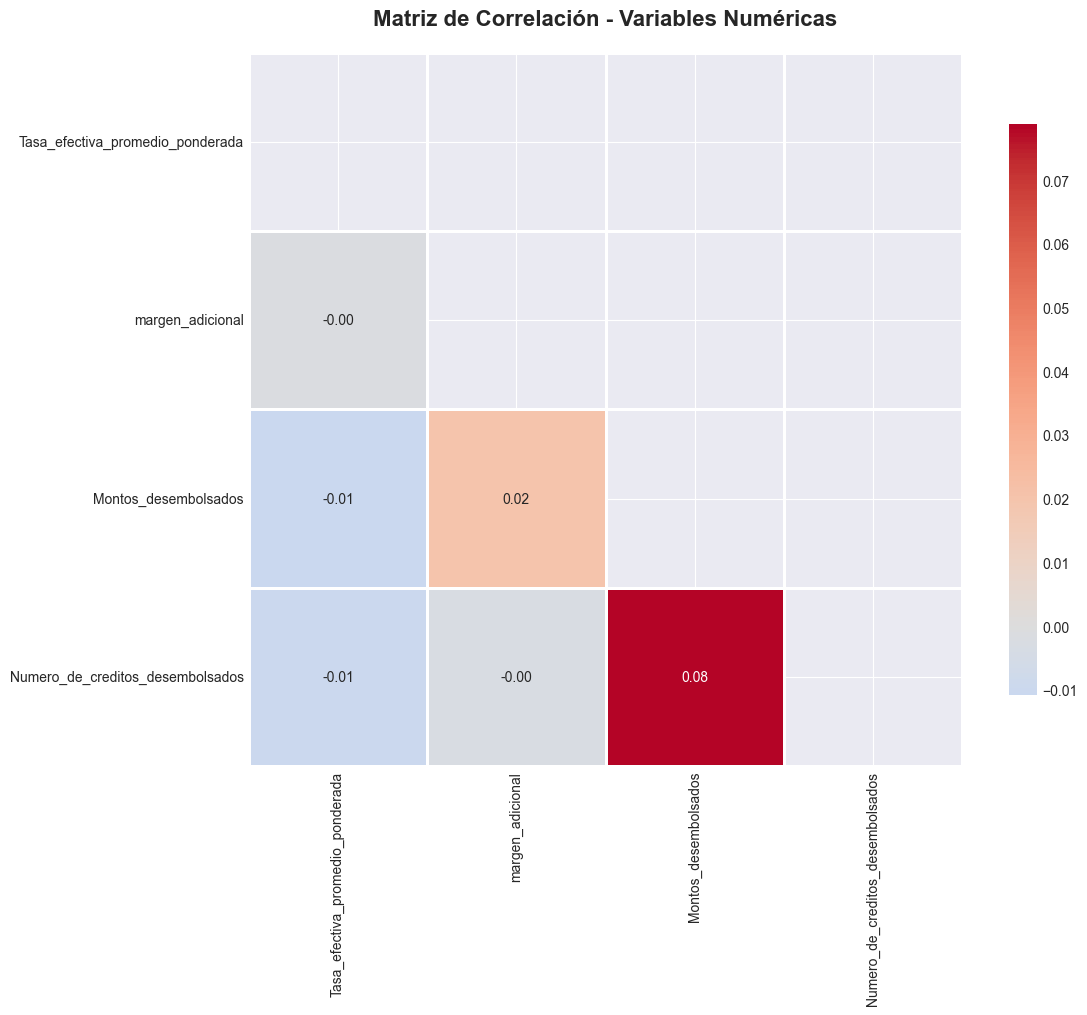

In [19]:
# Visualización de la matriz de correlación
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [20]:
# Identificar correlaciones fuertes
print("\n CORRELACIONES SIGNIFICATIVAS (|r| > 0.3):")
print("="*100)

correlaciones_fuertes = []
for i in range(len(correlacion.columns)):
    for j in range(i+1, len(correlacion.columns)):
        if abs(correlacion.iloc[i, j]) > 0.3:
            correlaciones_fuertes.append({
                'Variable_1': correlacion.columns[i],
                'Variable_2': correlacion.columns[j],
                'Correlación': correlacion.iloc[i, j],
                'Interpretación': 'Positiva fuerte' if correlacion.iloc[i, j] > 0.7 else 
                                 ('Positiva moderada' if correlacion.iloc[i, j] > 0.3 else
                                 ('Negativa fuerte' if correlacion.iloc[i, j] < -0.7 else 'Negativa moderada'))
            })

if correlaciones_fuertes:
    df_corr_fuertes = pd.DataFrame(correlaciones_fuertes).sort_values('Correlación', key=abs, ascending=False)
    print(df_corr_fuertes)
else:
    print("No se encontraron correlaciones significativas entre variables")


 CORRELACIONES SIGNIFICATIVAS (|r| > 0.3):
No se encontraron correlaciones significativas entre variables


### Detección de Outliers (Valores Atípicos)

In [21]:
# Método IQR (Rango Intercuartílico)
print("\n DETECCIÓN DE OUTLIERS (Método IQR):")
print("="*100)

outliers_info = []

for col in columnas_numericas_analisis:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    n_outliers = len(outliers)
    pct_outliers = (n_outliers / len(df) * 100)
    
    outliers_info.append({
        'Variable': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Límite_Inferior': limite_inferior,
        'Límite_Superior': limite_superior,
        'N_Outliers': n_outliers,
        '%_Outliers': round(pct_outliers, 2)
    })

df_outliers = pd.DataFrame(outliers_info).sort_values('%_Outliers', ascending=False)
df_outliers


 DETECCIÓN DE OUTLIERS (Método IQR):


,Variable,Q1,Q3,IQR,Límite_Inferior,Límite_Superior,N_Outliers,%_Outliers
2,Montos_desembolsados,235000.00,4859000.00,4624000.00,-6701000.00,11795000.00,1834302,13.92
3,Numero_de_creditos_desembolsados,1.00,4.00,3.00,-3.50,8.50,1619020,12.29
1,margen_adicional,0.00,0.00,0.00,0.00,0.00,561281,4.26
0,Tasa_efectiva_promedio_ponderada,11.93,25.95,14.02,-9.10,46.98,480426,3.65


**Interpretación de outliers en el contexto de negocio:**

Los outliers no son necesariamente errores. En el contexto financiero pueden representar:

1. **En Tasas de Interés:**
   - Productos de nicho o alto riesgo
   - Créditos en mora o reestructurados
   - Promociones especiales o tasas subsidiadas

2. **En Montos Desembolsados:**
   - Créditos empresariales grandes vs microcréditos
   - Diferencias naturales entre segmentos

3. **En Número de Créditos:**
   - Agregaciones de múltiples operaciones
   - Operaciones masivas de entidades grandes

---

##  ANÁLISIS CUALITATIVO

### Variables Categóricas

In [22]:
# Identificar columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()

# Eliminar columnas de fecha en formato texto si existen
columnas_categoricas = [col for col in columnas_categoricas if 'fecha' not in col.lower() and 'año_mes' not in col.lower()]

print(f"\n COLUMNAS CATEGÓRICAS PARA ANÁLISIS: {len(columnas_categoricas)}")
print(columnas_categoricas)


 COLUMNAS CATEGÓRICAS PARA ANÁLISIS: 14
['Nombre_Tipo_Entidad', 'Nombre_Entidad', 'Tipo_de_persona', 'Sexo', 'Tamaño_de_empresa', 'Tipo_de_credito', 'Tipo_de_garantia', 'Producto_de_credito', 'Plazo_de_credito', 'Grupo_Etnico', 'Antiguedad_de_la_empresa', 'Tipo_de_Tasa', 'Rango_monto_desembolsado', 'Clase_deudor']


In [23]:
# Análisis de cardinalidad (número de categorías únicas)
print("\n CARDINALIDAD DE VARIABLES CATEGÓRICAS:")
print("="*100)

cardinalidad = pd.DataFrame({
    'Variable': columnas_categoricas,
    'Valores_Únicos': [df[col].nunique() for col in columnas_categoricas],
    'Valores_Nulos': [df[col].isnull().sum() for col in columnas_categoricas],
    'Categoría_Dominante': [df[col].mode()[0] if len(df[col].mode()) > 0 else 'N/A' for col in columnas_categoricas],
    'Frecuencia_Dominante': [df[col].value_counts().iloc[0] if len(df[col]) > 0 else 0 for col in columnas_categoricas],
    '%_Dominante': [(df[col].value_counts().iloc[0] / len(df) * 100).round(2) if len(df[col]) > 0 else 0 for col in columnas_categoricas]
}).sort_values('Valores_Únicos', ascending=False)

cardinalidad


 CARDINALIDAD DE VARIABLES CATEGÓRICAS:


,Variable,Valores_Únicos,Valores_Nulos,Categoría_Dominante,Frecuencia_Dominante,%_Dominante
7,Producto_de_credito,65,1,Tarjeta de crédito para ingresos superiores a ...,5637797,42.79
1,Nombre_Entidad,52,0,Bancolombia,3088558,23.44
12,Rango_monto_desembolsado,42,911,Hasta 1 SMLMV,8343428,63.32
8,Plazo_de_credito,27,0,Consumos a un mes,4275969,32.45
11,Tipo_de_Tasa,14,911,FS,12525725,95.07
5,Tipo_de_credito,8,0,Consumo,9229443,70.05
9,Grupo_Etnico,8,911,Sin información (1),8118751,61.62
4,Tamaño_de_empresa,5,0,No aplica,9309959,70.66
3,Sexo,5,0,Masculino,5526356,41.94
0,Nombre_Tipo_Entidad,5,0,BC-ESTABLECIMIENTO BANCARIO,11463728,87.01


### Distribución de Frecuencias por Variable Categórica

In [24]:
# Función para analizar variables categóricas
def analizar_variable_categorica(df, columna, top_n=10):
    """
    Analiza una variable categórica y muestra su distribución
    """
    print(f"\n{'='*100}")
    print(f" ANÁLISIS DE: {columna}")
    print(f"{'='*100}")
    
    # Frecuencias absolutas y relativas
    freq_abs = df[columna].value_counts()
    freq_rel = df[columna].value_counts(normalize=True) * 100
    
    analisis = pd.DataFrame({
        'Categoría': freq_abs.index,
        'Frecuencia': freq_abs.values,
        'Porcentaje': freq_rel.values.round(2),
        'Porcentaje_Acumulado': freq_rel.cumsum().values.round(2)
    })
    
    print(f"\nTotal de categorías: {len(analisis)}")
    print(f"\nTop {min(top_n, len(analisis))} categorías más frecuentes:\n")
    print(analisis.head(top_n))
    
    return analisis

In [25]:
# Analizar variables categóricas clave
variables_clave = ['Nombre_Tipo_Entidad', 'Tipo_de_persona', 'Sexo', 'Tamaño_de_empresa', 
                   'Tipo_de_credito', 'Tipo_de_garantia', 'Clase_deudor']

# Filtrar solo las que existen en el dataset
variables_clave = [col for col in variables_clave if col in df.columns]

analisis_categoricas = {}
for var in variables_clave:
    analisis_categoricas[var] = analizar_variable_categorica(df, var, top_n=15)


 ANÁLISIS DE: Nombre_Tipo_Entidad

Total de categorías: 5

Top 5 categorías más frecuentes:

                             Categoría  Frecuencia  Porcentaje  \
0          BC-ESTABLECIMIENTO BANCARIO    11463728       87.01   
1        CF-COMPAÑÍA DE FINANCIAMIENTO     1553485       11.79   
2  COOPERATIVAS DE CARÁCTER FINANCIERO      144357        1.10   
3         INSTITUCIÓN OFICIAL ESPECIAL       13991        0.11   
4            CF-CORPORACIÓN FINANCIERA          10        0.00   

   Porcentaje_Acumulado  
0                 87.01  
1                 98.80  
2                 99.89  
3                100.00  
4                100.00  

 ANÁLISIS DE: Tipo_de_persona

Total de categorías: 2

Top 2 categorías más frecuentes:

  Categoría  Frecuencia  Porcentaje  Porcentaje_Acumulado
0   Natural    10314442       78.28                 78.28
1  Jurídica     2861129       21.72                100.00

 ANÁLISIS DE: Sexo

Total de categorías: 5

Top 5 categorías más frecuentes:

    Catego

### Análisis Cruzado: Variables Categóricas vs Tasa de Interés

In [26]:
# Análisis de tasa promedio por categoría
if 'Tasa_efectiva_promedio_ponderada' in df.columns:
    print("\n TASA DE INTERÉS PROMEDIO POR CATEGORÍA:")
    print("="*100)
    
    for var in variables_clave[:5]:  # Primeras 5 variables clave
        print(f"\n Por {var}:")
        tasa_por_categoria = df.groupby(var)['Tasa_efectiva_promedio_ponderada'].agg([
            ('Promedio', 'mean'),
            ('Mediana', 'median'),
            ('Desv_Std', 'std'),
            ('Min', 'min'),
            ('Max', 'max'),
            ('Count', 'count')
        ]).round(2).sort_values('Promedio', ascending=False)
        
        print(tasa_por_categoria.head(10))
        print()


 TASA DE INTERÉS PROMEDIO POR CATEGORÍA:

 Por Nombre_Tipo_Entidad:
                                     Promedio  Mediana  Desv_Std   Min   Max  \
Nombre_Tipo_Entidad                                                            
COOPERATIVAS DE CARÁCTER FINANCIERO     23.75    24.46      6.19  0.00 60.58   
CF-COMPAÑÍA DE FINANCIAMIENTO           23.54    25.23      7.45  0.00 72.00   
BC-ESTABLECIMIENTO BANCARIO             19.77    24.86     14.62  0.00 88.90   
CF-CORPORACIÓN FINANCIERA               11.84    11.93      0.63 10.77 13.27   
INSTITUCIÓN OFICIAL ESPECIAL             8.96     7.52      3.55  0.00 23.87   

                                        Count  
Nombre_Tipo_Entidad                            
COOPERATIVAS DE CARÁCTER FINANCIERO    144357  
CF-COMPAÑÍA DE FINANCIAMIENTO         1553485  
BC-ESTABLECIMIENTO BANCARIO          11463728  
CF-CORPORACIÓN FINANCIERA                  10  
INSTITUCIÓN OFICIAL ESPECIAL            13991  


 Por Tipo_de_persona:
          

### Tablas de Contingencia (Variables Categóricas)

In [27]:
# Tabla de contingencia: Tipo de persona vs Sexo
if 'Tipo_de_persona' in df.columns and 'Sexo' in df.columns:
    print("\n TABLA DE CONTINGENCIA: Tipo de Persona vs Sexo")
    print("="*100)
    
    tabla_contingencia = pd.crosstab(df['Tipo_de_persona'], df['Sexo'], margins=True, margins_name='Total')
    print("\nFrecuencias Absolutas:")
    print(tabla_contingencia)
    
    print("\nFrecuencias Relativas (%):")
    tabla_contingencia_pct = pd.crosstab(df['Tipo_de_persona'], df['Sexo'], normalize='all') * 100
    print(tabla_contingencia_pct.round(2))


 TABLA DE CONTINGENCIA: Tipo de Persona vs Sexo

Frecuencias Absolutas:
Sexo             Femenino  Masculino  No aplica  No binario  Trans     Total
Tipo_de_persona                                                             
Jurídica                0          0    2861129           0      0   2861129
Natural           4787639    5526356          0         238    209  10314442
Total             4787639    5526356    2861129         238    209  13175571

Frecuencias Relativas (%):
Sexo             Femenino  Masculino  No aplica  No binario  Trans
Tipo_de_persona                                                   
Jurídica             0.00       0.00      21.72        0.00   0.00
Natural             36.34      41.94       0.00        0.00   0.00


In [28]:
# Tabla de contingencia: Tamaño de empresa vs Tipo de crédito
if 'Tamaño_de_empresa' in df.columns and 'Tipo_de_credito' in df.columns:
    print("\n TABLA DE CONTINGENCIA: Tamaño de Empresa vs Tipo de Crédito")
    print("="*100)
    
    tabla_contingencia2 = pd.crosstab(df['Tamaño_de_empresa'], df['Tipo_de_credito'], margins=True, margins_name='Total')
    print("\nFrecuencias Absolutas (Top 10 combinaciones):")
    print(tabla_contingencia2.head(10))


 TABLA DE CONTINGENCIA: Tamaño de Empresa vs Tipo de Crédito

Frecuencias Absolutas (Top 10 combinaciones):
Tipo_de_credito    Comercial especial  Comercial ordinario  \
Tamaño_de_empresa                                            
Gran empresa                      749               714623   
Mediana empresa                  1232               552654   
Microempresa                      443               768035   
No aplica                           0                    0   
Pequeña empresa                  1555               948142   
Total                            3979              2983454   

Tipo_de_credito    Comercial preferencial o corporativo  Comercial tesoreria  \
Tamaño_de_empresa                                                              
Gran empresa                                      27291                 1832   
Mediana empresa                                    7933                 1072   
Microempresa                                       2263                  2

### Test de Chi-Cuadrado (Independencia entre Variables Categóricas)

In [29]:
# Test de Chi-cuadrado para variables categóricas
print("\n TEST DE CHI-CUADRADO (Independencia entre variables):")
print("="*100)

if 'Tipo_de_persona' in df.columns and 'Sexo' in df.columns:
    tabla = pd.crosstab(df['Tipo_de_persona'], df['Sexo'])
    chi2, p_value, dof, expected = chi2_contingency(tabla)
    
    print(f"\n Tipo de Persona vs Sexo:")
    print(f"   Chi-cuadrado: {chi2:.4f}")
    print(f"   p-value: {p_value:.4f}")
    print(f"   Grados de libertad: {dof}")
    
    if p_value < 0.05:
        print(f"    Conclusión: Existe dependencia significativa entre las variables (p < 0.05)")
    else:
        print(f"    Conclusión: No existe dependencia significativa entre las variables (p >= 0.05)")


 TEST DE CHI-CUADRADO (Independencia entre variables):

 Tipo de Persona vs Sexo:
   Chi-cuadrado: 13175571.0000
   p-value: 0.0000
   Grados de libertad: 4
    Conclusión: Existe dependencia significativa entre las variables (p < 0.05)


---

##  ANÁLISIS GRÁFICO

### Visualizaciones de Variables Numéricas


 DISTRIBUCIÓN DE VARIABLES NUMÉRICAS:


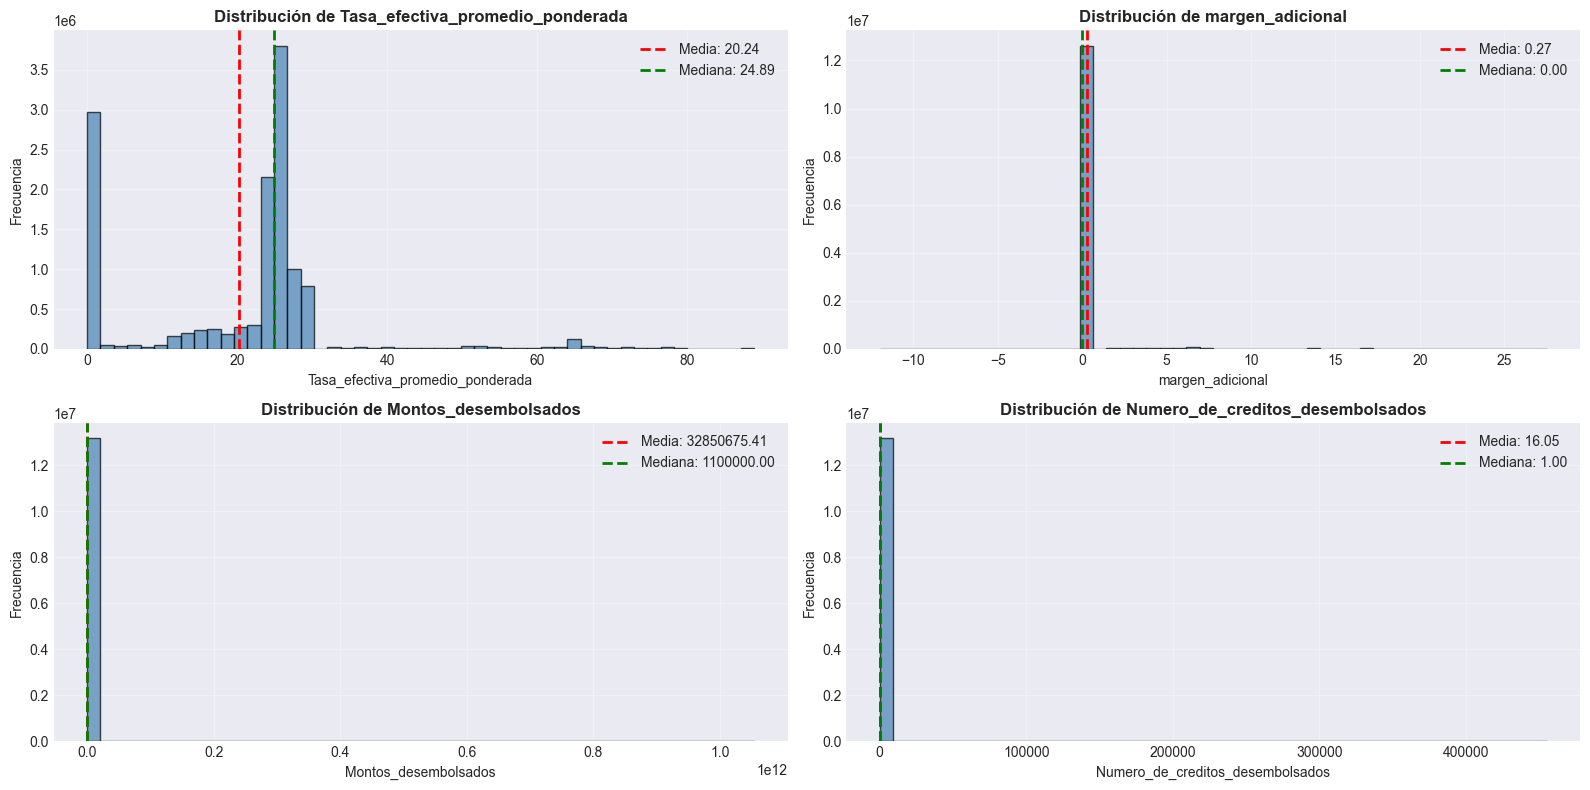

In [30]:
# Histogramas de variables numéricas
print("\n DISTRIBUCIÓN DE VARIABLES NUMÉRICAS:")
print("="*100)

n_cols = 2
n_rows = (len(columnas_numericas_analisis) + 1) // 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(columnas_numericas_analisis):
    axes[idx].hist(df[col].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frecuencia', fontsize=10)
    axes[idx].grid(alpha=0.3)
    
    # Agregar estadísticas
    media = df[col].mean()
    mediana = df[col].median()
    axes[idx].axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
    axes[idx].axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')
    axes[idx].legend()

# Ocultar ejes vacíos
for idx in range(len(columnas_numericas_analisis), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


 BOX PLOTS - DETECCIÓN DE OUTLIERS:


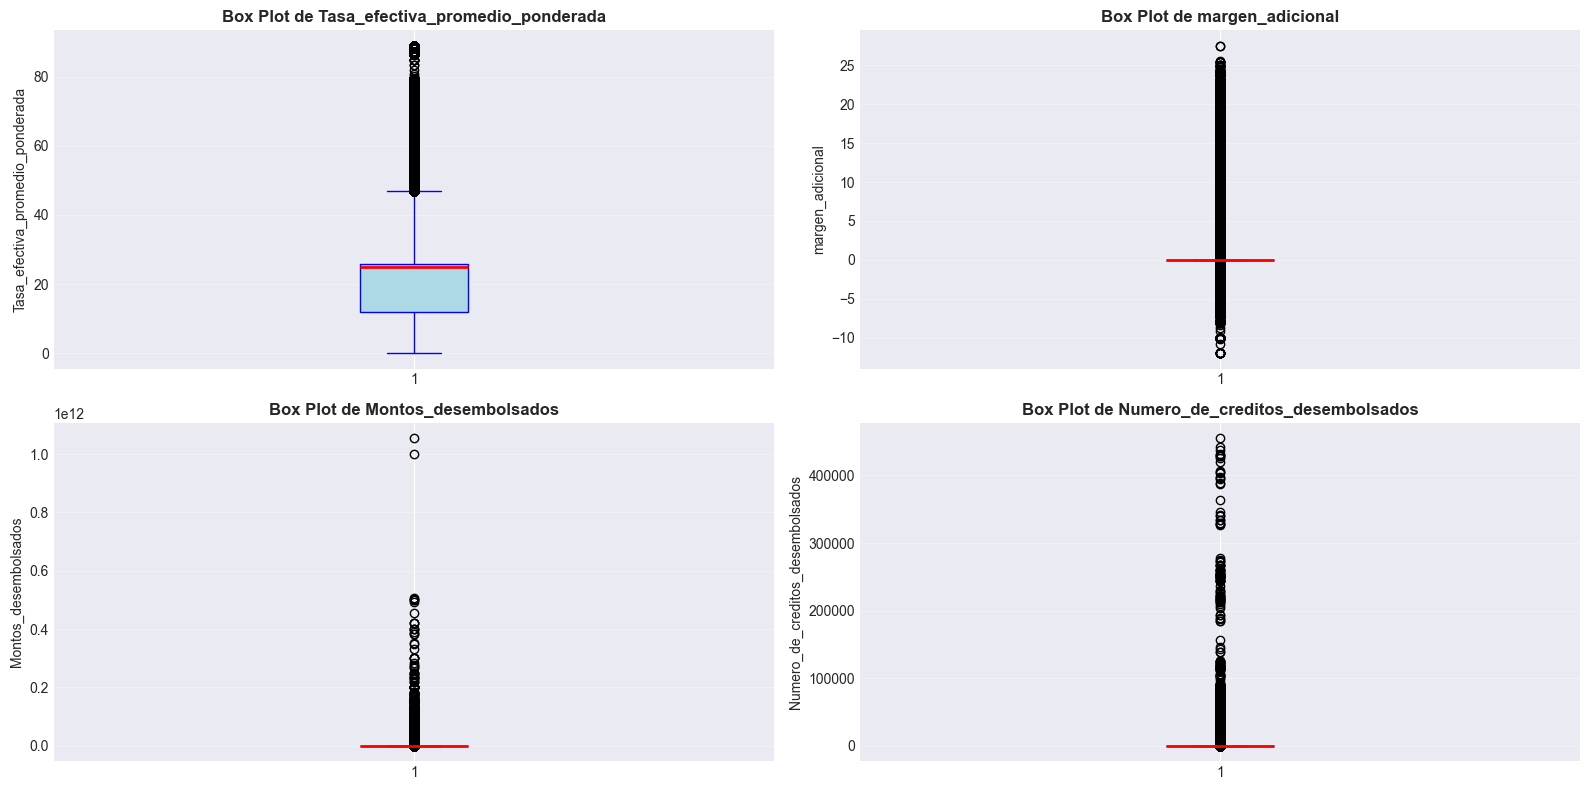

In [31]:
# Box plots de variables numéricas
print("\n BOX PLOTS - DETECCIÓN DE OUTLIERS:")
print("="*100)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*4))
axes = axes.flatten()

for idx, col in enumerate(columnas_numericas_analisis):
    axes[idx].boxplot(df[col].dropna(), vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightblue', color='blue'),
                     medianprops=dict(color='red', linewidth=2),
                     whiskerprops=dict(color='blue'),
                     capprops=dict(color='blue'))
    axes[idx].set_title(f'Box Plot de {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].grid(alpha=0.3, axis='y')

# Ocultar ejes vacíos
for idx in range(len(columnas_numericas_analisis), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

### Visualizaciones de Variables Categóricas


 DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS:


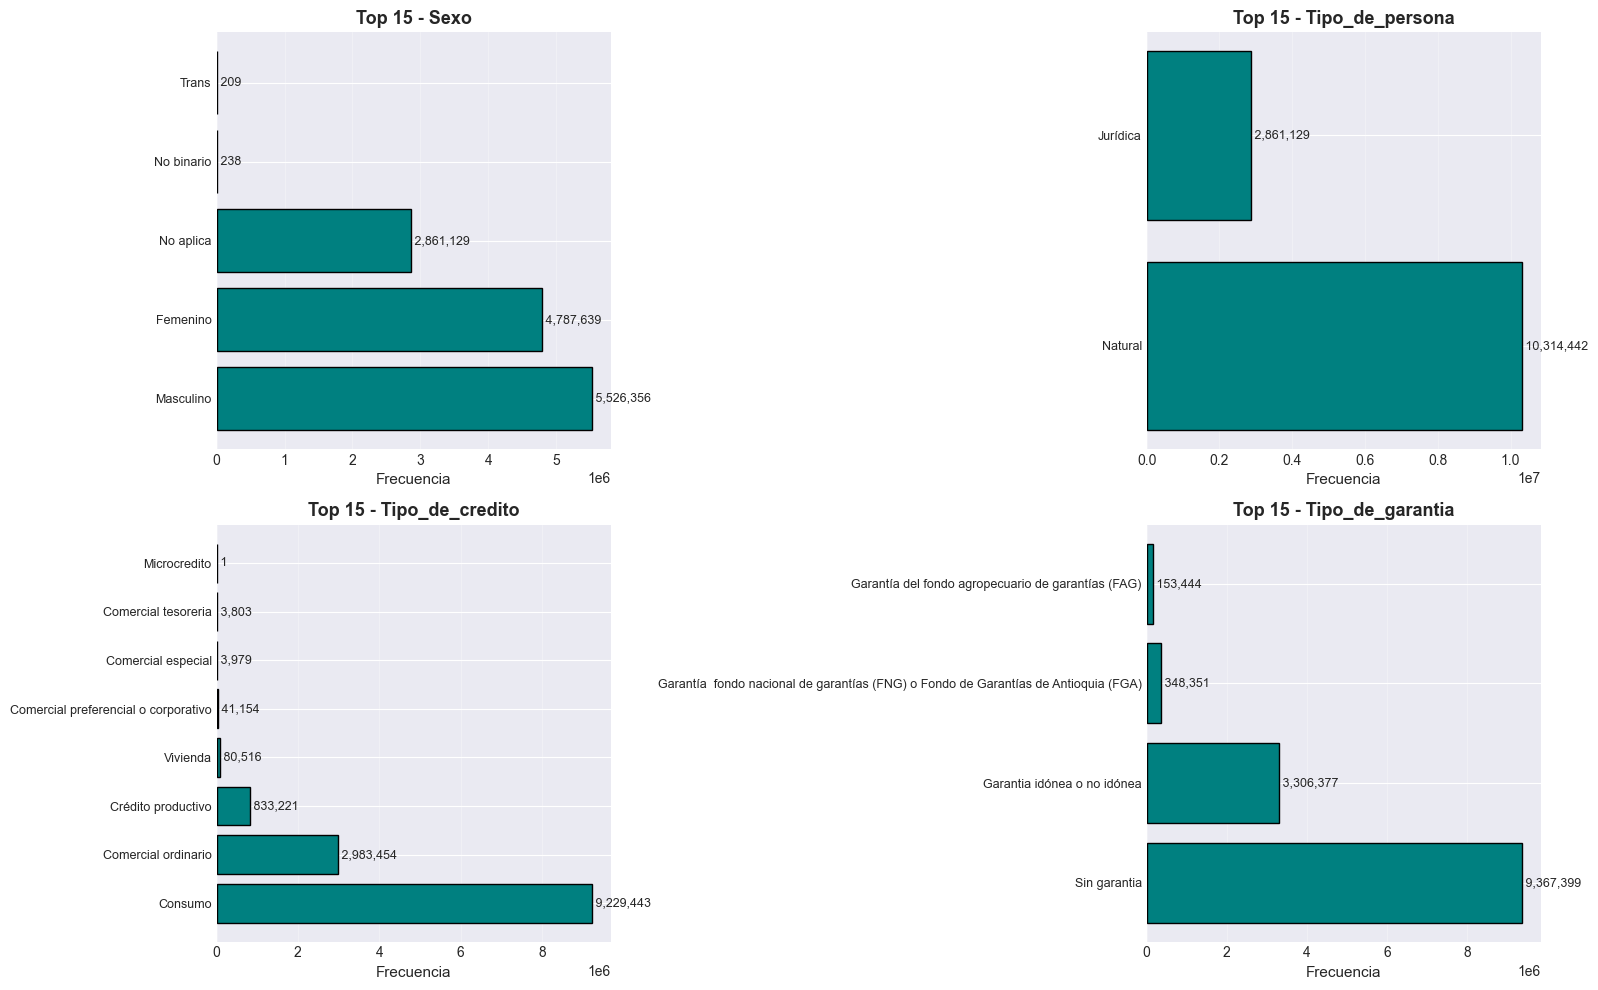

In [32]:
# Gráficos de barras para variables categóricas clave
print("\n DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS:")
print("="*100)

variables_visualizar = ['Sexo', 'Tipo_de_persona', 'Tipo_de_credito', 'Tipo_de_garantia']
variables_visualizar = [col for col in variables_visualizar if col in df.columns]

n_vars = len(variables_visualizar)
n_cols_cat = 2
n_rows_cat = (n_vars + 1) // 2

fig, axes = plt.subplots(n_rows_cat, n_cols_cat, figsize=(16, n_rows_cat*5))
axes = axes.flatten() if n_vars > 1 else [axes]

for idx, col in enumerate(variables_visualizar):
    top_categories = df[col].value_counts().head(15)
    
    axes[idx].barh(range(len(top_categories)), top_categories.values, color='teal', edgecolor='black')
    axes[idx].set_yticks(range(len(top_categories)))
    axes[idx].set_yticklabels(top_categories.index, fontsize=9)
    axes[idx].set_xlabel('Frecuencia', fontsize=11)
    axes[idx].set_title(f'Top 15 - {col}', fontsize=13, fontweight='bold')
    axes[idx].grid(axis='x', alpha=0.3)
    
    # Añadir valores en las barras
    for i, v in enumerate(top_categories.values):
        axes[idx].text(v, i, f' {v:,}', va='center', fontsize=9)

# Ocultar ejes vacíos
for idx in range(n_vars, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

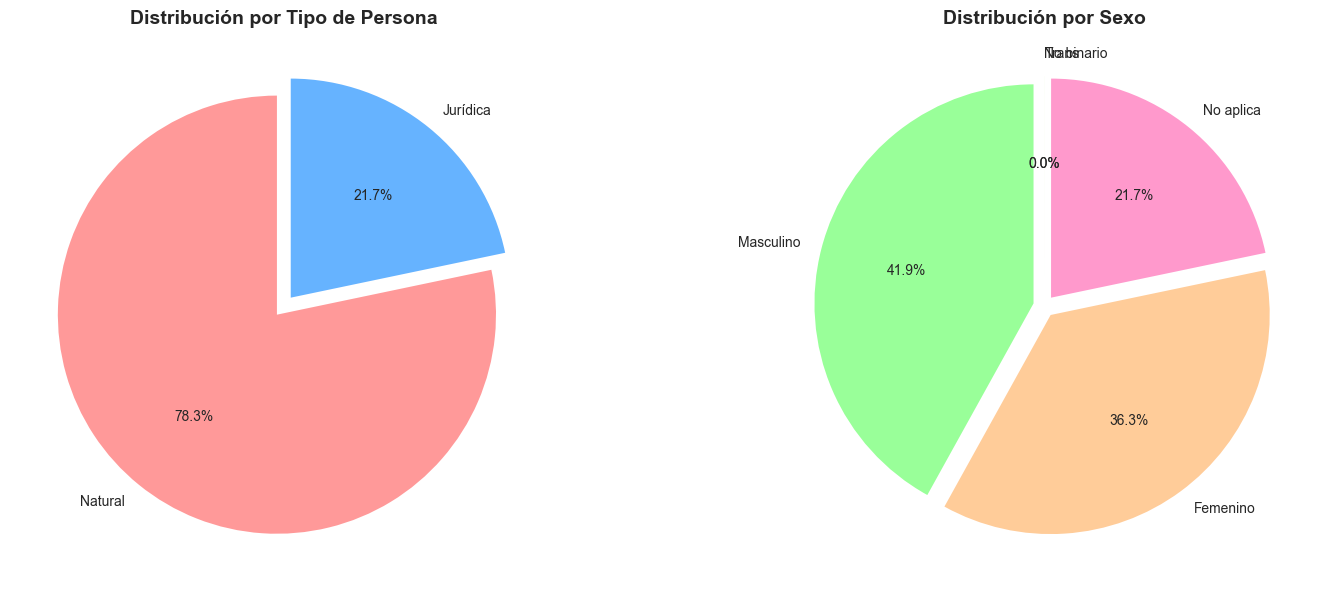

In [33]:
# Gráficos de torta para variables con pocas categorías
if 'Tipo_de_persona' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Tipo de persona
    tipo_persona = df['Tipo_de_persona'].value_counts()
    axes[0].pie(tipo_persona.values, labels=tipo_persona.index, autopct='%1.1f%%',
               startangle=90, colors=['#ff9999', '#66b3ff'], explode=[0.05]*len(tipo_persona))
    axes[0].set_title('Distribución por Tipo de Persona', fontsize=14, fontweight='bold')
    
    # Sexo
    if 'Sexo' in df.columns:
        sexo = df['Sexo'].value_counts()
        axes[1].pie(sexo.values, labels=sexo.index, autopct='%1.1f%%',
                   startangle=90, colors=['#99ff99', '#ffcc99', '#ff99cc'], explode=[0.05]*len(sexo))
        axes[1].set_title('Distribución por Sexo', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

### Análisis Temporal (si aplica)


 ANÁLISIS TEMPORAL DE TASAS DE INTERÉS:


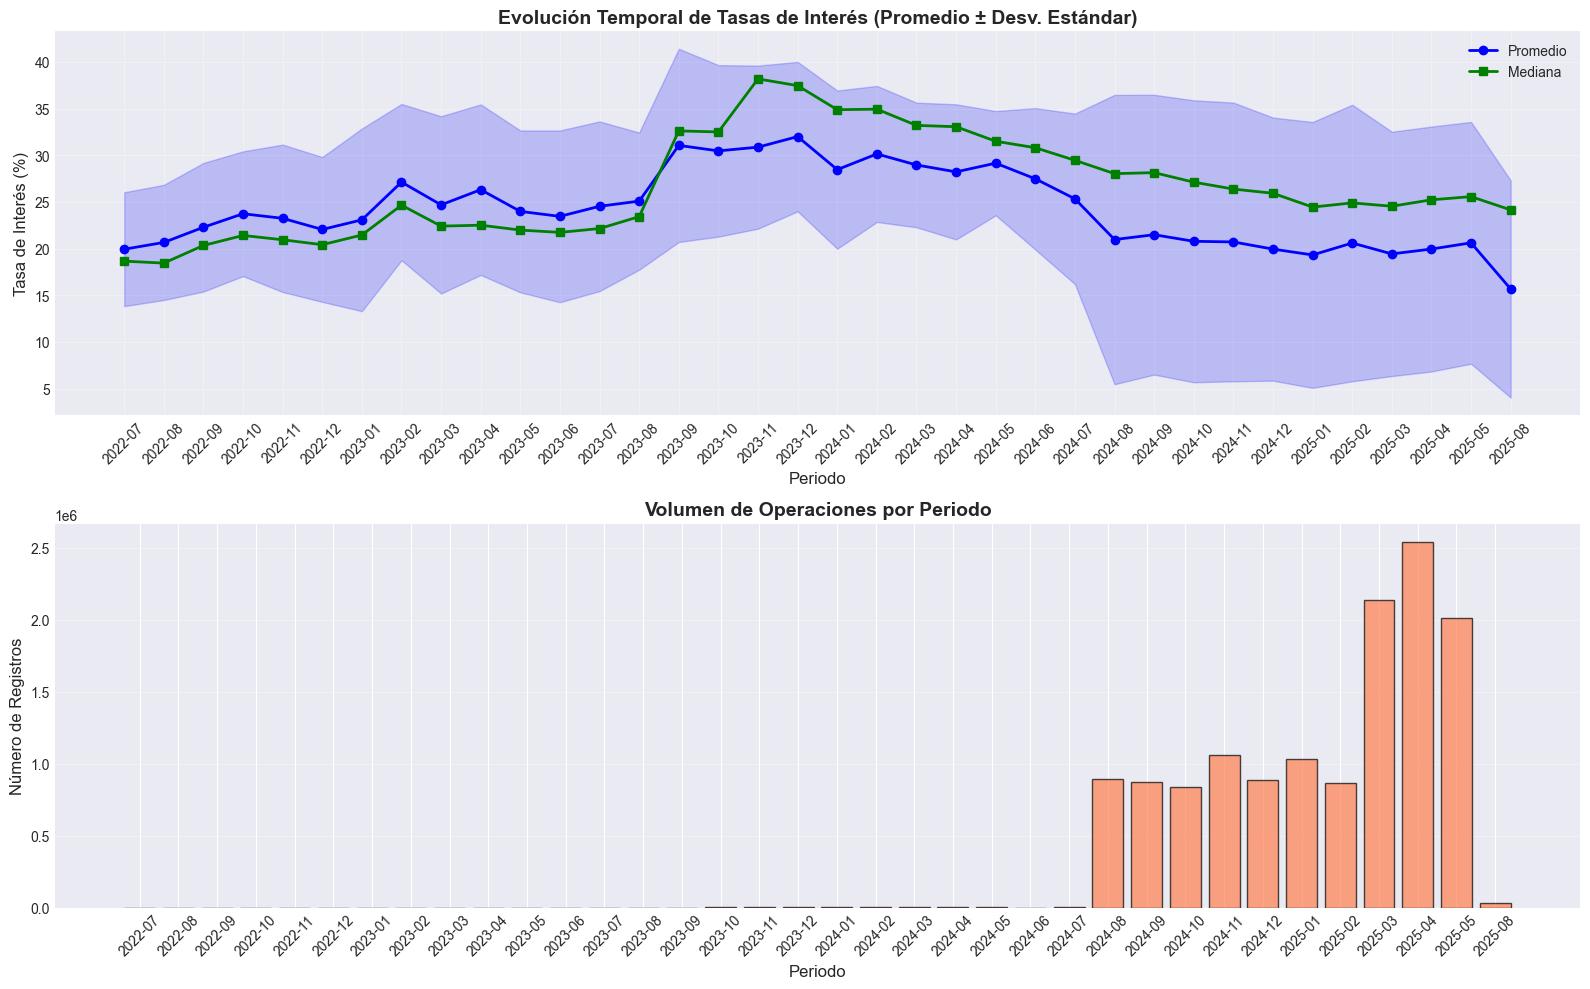

In [34]:
# Evolución temporal de la tasa de interés
if 'Fecha_Corte' in df.columns and 'Tasa_efectiva_promedio_ponderada' in df.columns:
    print("\n ANÁLISIS TEMPORAL DE TASAS DE INTERÉS:")
    print("="*100)
    
    # Tasa promedio mensual
    tasa_temporal = df.groupby('Año_Mes')['Tasa_efectiva_promedio_ponderada'].agg(['mean', 'median', 'std', 'count']).reset_index()
    
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    
    # Gráfico 1: Evolución de tasa promedio y mediana
    axes[0].plot(tasa_temporal['Año_Mes'], tasa_temporal['mean'], marker='o', linewidth=2, label='Promedio', color='blue')
    axes[0].plot(tasa_temporal['Año_Mes'], tasa_temporal['median'], marker='s', linewidth=2, label='Mediana', color='green')
    axes[0].fill_between(tasa_temporal['Año_Mes'], 
                         tasa_temporal['mean'] - tasa_temporal['std'], 
                         tasa_temporal['mean'] + tasa_temporal['std'], 
                         alpha=0.2, color='blue')
    axes[0].set_title('Evolución Temporal de Tasas de Interés (Promedio ± Desv. Estándar)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Periodo', fontsize=12)
    axes[0].set_ylabel('Tasa de Interés (%)', fontsize=12)
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    axes[0].tick_params(axis='x', rotation=45)
    
    # Gráfico 2: Número de operaciones por periodo
    axes[1].bar(tasa_temporal['Año_Mes'], tasa_temporal['count'], color='coral', edgecolor='black', alpha=0.7)
    axes[1].set_title('Volumen de Operaciones por Periodo', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Periodo', fontsize=12)
    axes[1].set_ylabel('Número de Registros', fontsize=12)
    axes[1].grid(axis='y', alpha=0.3)
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

### Análisis Multivariado: Scatter Plots


 RELACIÓN: Montos Desembolsados vs Tasa de Interés:


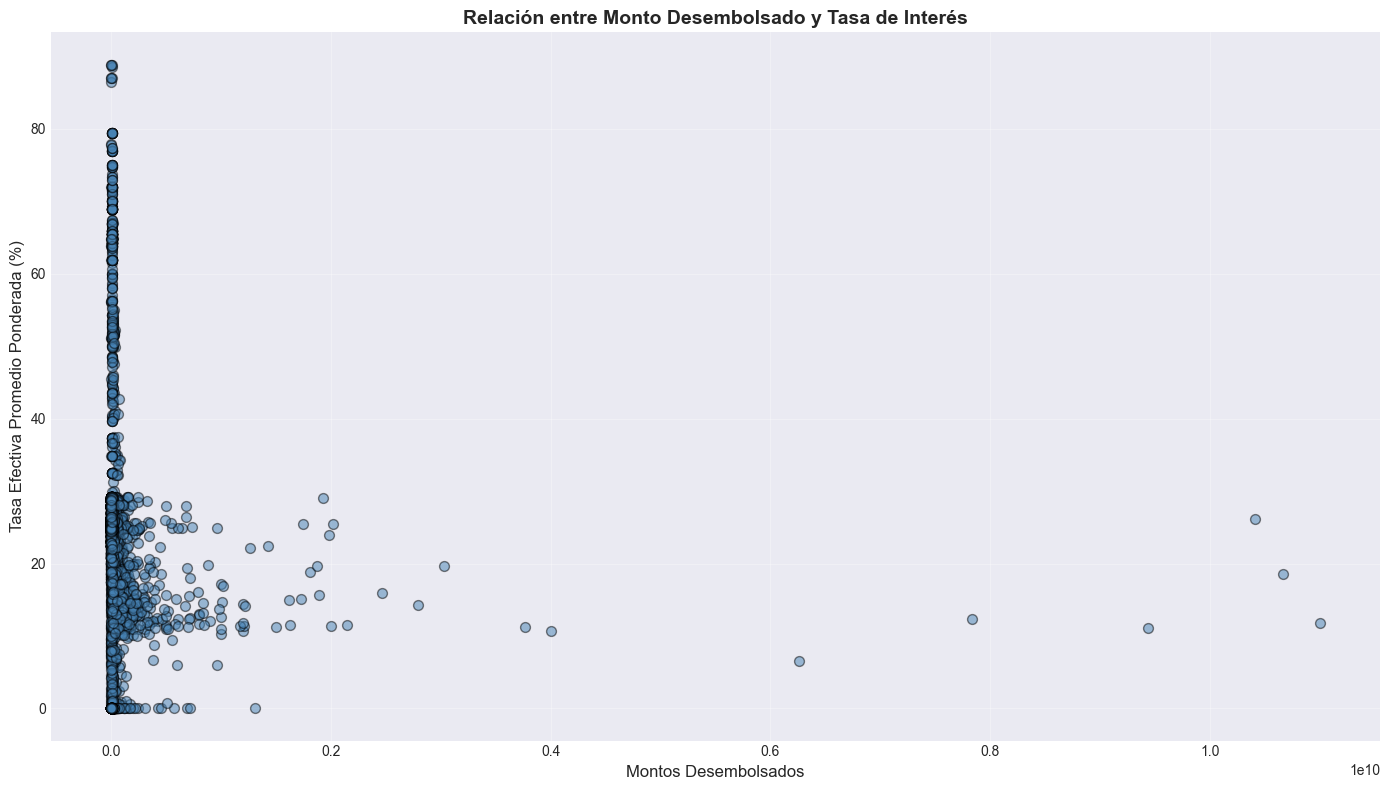

In [35]:
# Scatter plot: Montos desembolsados vs Tasa de interés
if 'Montos_desembolsados' in df.columns and 'Tasa_efectiva_promedio_ponderada' in df.columns:
    print("\n RELACIÓN: Montos Desembolsados vs Tasa de Interés:")
    print("="*100)
    
    # Tomar una muestra si el dataset es muy grande
    sample_size = min(10000, len(df))
    df_sample = df.sample(n=sample_size, random_state=42)
    
    plt.figure(figsize=(14, 8))
    plt.scatter(df_sample['Montos_desembolsados'], 
               df_sample['Tasa_efectiva_promedio_ponderada'],
               alpha=0.5, s=50, c='steelblue', edgecolors='black')
    plt.xlabel('Montos Desembolsados', fontsize=12)
    plt.ylabel('Tasa Efectiva Promedio Ponderada (%)', fontsize=12)
    plt.title('Relación entre Monto Desembolsado y Tasa de Interés', fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

### Análisis por Segmentos: Violin Plots


 DISTRIBUCIÓN DE TASAS POR TIPO DE CRÉDITO:


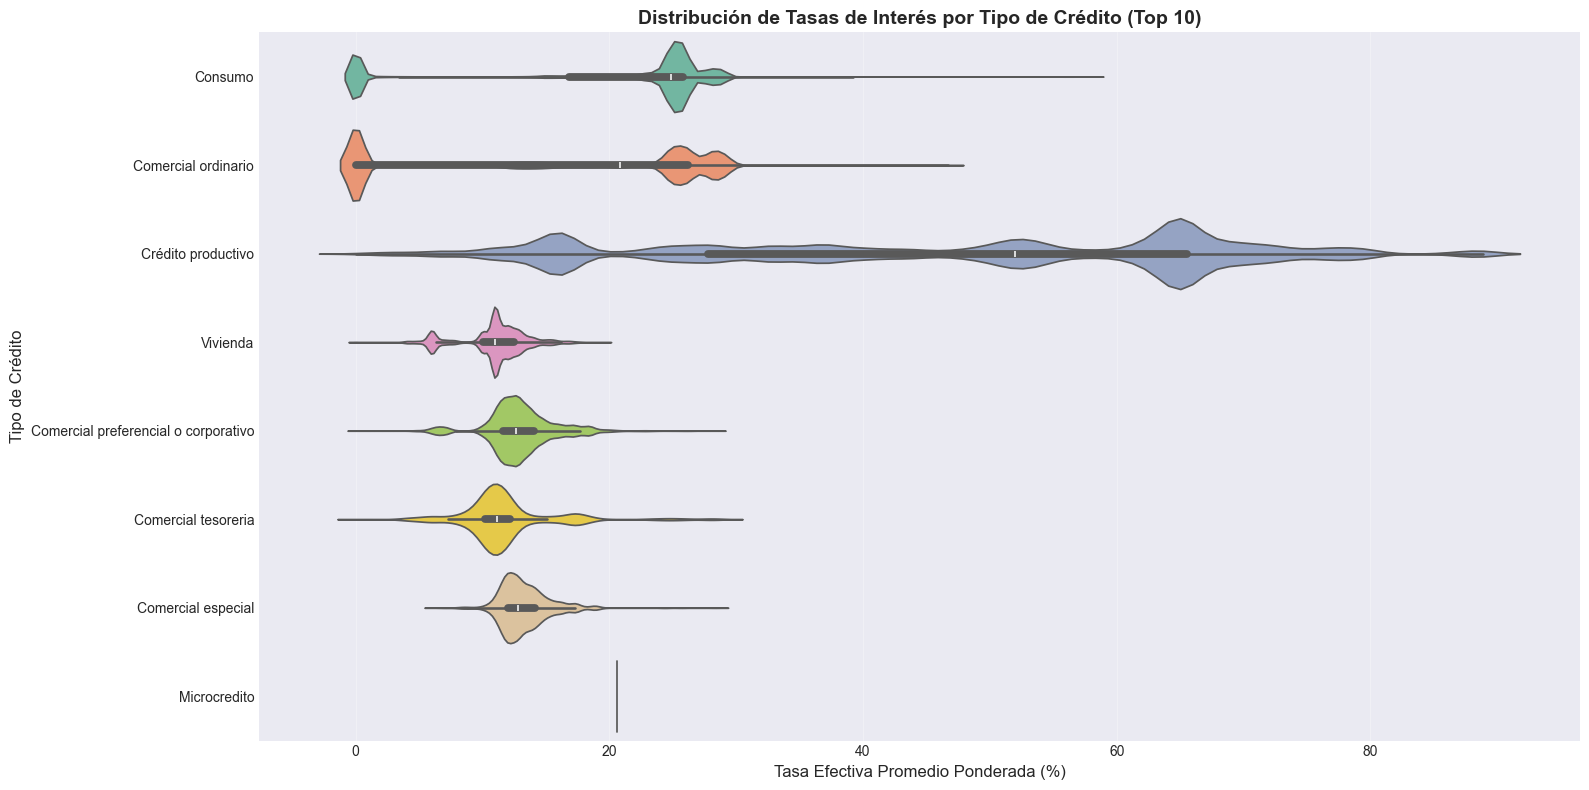

In [36]:
# Violin plot: Tasa de interés por tipo de crédito
if 'Tipo_de_credito' in df.columns and 'Tasa_efectiva_promedio_ponderada' in df.columns:
    print("\n DISTRIBUCIÓN DE TASAS POR TIPO DE CRÉDITO:")
    print("="*100)
    
    # Seleccionar top tipos de crédito
    top_tipos = df['Tipo_de_credito'].value_counts().head(10).index
    df_top = df[df['Tipo_de_credito'].isin(top_tipos)]
    
    plt.figure(figsize=(16, 8))
    sns.violinplot(data=df_top, y='Tipo_de_credito', x='Tasa_efectiva_promedio_ponderada',
                   palette='Set2', orient='h')
    plt.xlabel('Tasa Efectiva Promedio Ponderada (%)', fontsize=12)
    plt.ylabel('Tipo de Crédito', fontsize=12)
    plt.title('Distribución de Tasas de Interés por Tipo de Crédito (Top 10)', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()


 COMPARACIÓN DE TASAS: Sexo vs Tipo de Persona:


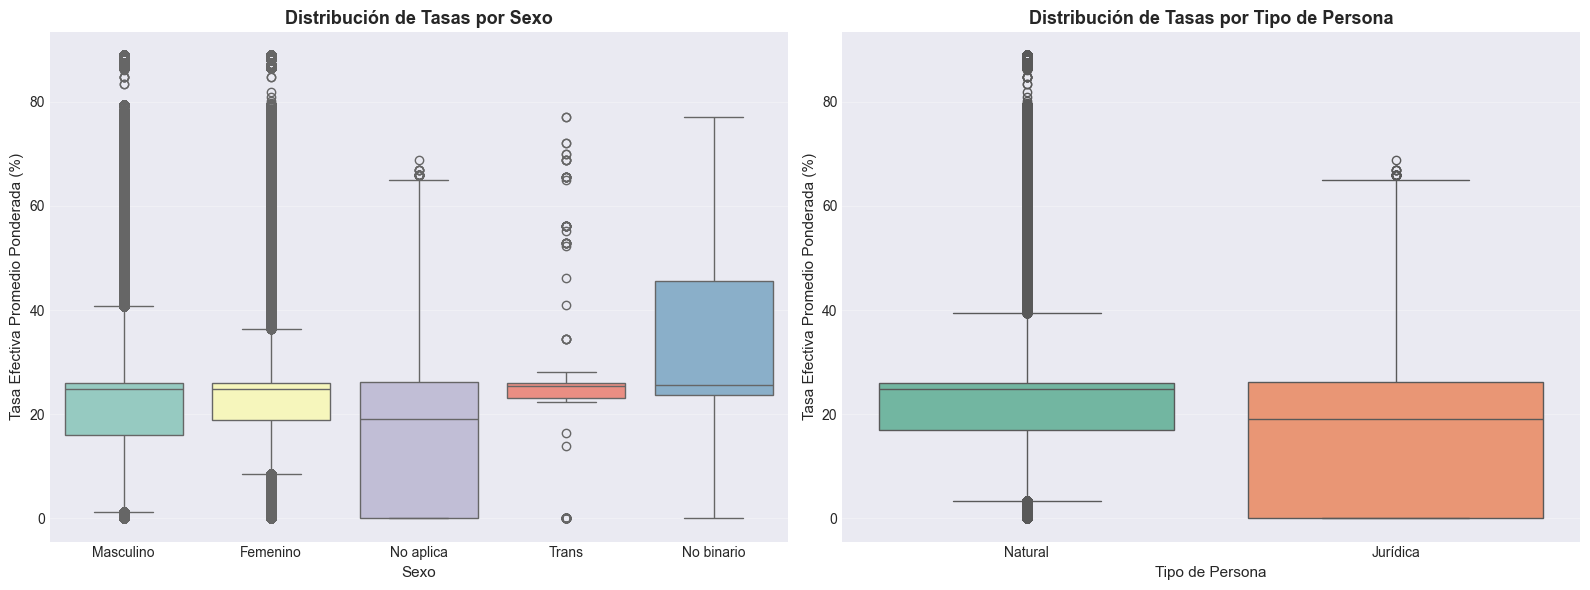

In [37]:
# Box plot comparativo: Tasa por sexo y tipo de persona
if all(col in df.columns for col in ['Sexo', 'Tipo_de_persona', 'Tasa_efectiva_promedio_ponderada']):
    print("\n COMPARACIÓN DE TASAS: Sexo vs Tipo de Persona:")
    print("="*100)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Por Sexo
    sns.boxplot(data=df, x='Sexo', y='Tasa_efectiva_promedio_ponderada', 
               palette='Set3', ax=axes[0])
    axes[0].set_title('Distribución de Tasas por Sexo', fontsize=13, fontweight='bold')
    axes[0].set_xlabel('Sexo', fontsize=11)
    axes[0].set_ylabel('Tasa Efectiva Promedio Ponderada (%)', fontsize=11)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Por Tipo de Persona
    sns.boxplot(data=df, x='Tipo_de_persona', y='Tasa_efectiva_promedio_ponderada',
               palette='Set2', ax=axes[1])
    axes[1].set_title('Distribución de Tasas por Tipo de Persona', fontsize=13, fontweight='bold')
    axes[1].set_xlabel('Tipo de Persona', fontsize=11)
    axes[1].set_ylabel('Tasa Efectiva Promedio Ponderada (%)', fontsize=11)
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### Heatmap: Tasa Promedio por Segmentos Cruzados


 HEATMAP: Tasa Promedio por Tipo de Crédito y Garantía:


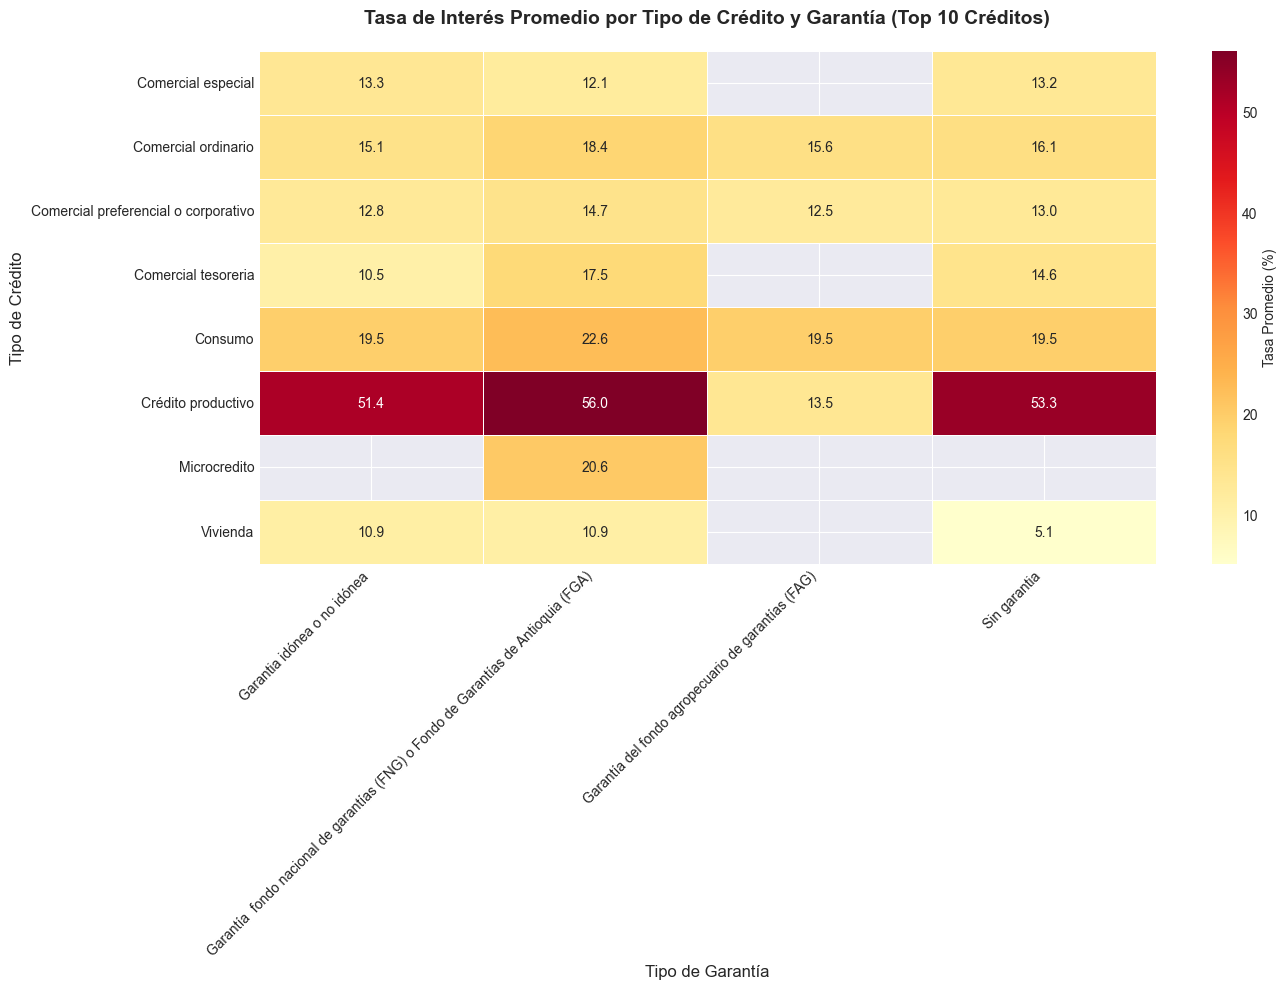

In [38]:
# Heatmap: Tasa promedio por Tipo de Crédito y Tipo de Garantía
if all(col in df.columns for col in ['Tipo_de_credito', 'Tipo_de_garantia', 'Tasa_efectiva_promedio_ponderada']):
    print("\n HEATMAP: Tasa Promedio por Tipo de Crédito y Garantía:")
    print("="*100)
    
    # Crear tabla pivote
    pivot_tasa = df.pivot_table(
        values='Tasa_efectiva_promedio_ponderada',
        index='Tipo_de_credito',
        columns='Tipo_de_garantia',
        aggfunc='mean'
    )
    
    # Seleccionar top 10 tipos de crédito por frecuencia
    top_creditos = df['Tipo_de_credito'].value_counts().head(10).index
    pivot_tasa_top = pivot_tasa.loc[pivot_tasa.index.isin(top_creditos)]
    
    plt.figure(figsize=(14, 10))
    sns.heatmap(pivot_tasa_top, annot=True, cmap='YlOrRd', fmt='.1f', 
               linewidths=0.5, cbar_kws={'label': 'Tasa Promedio (%)'})
    plt.title('Tasa de Interés Promedio por Tipo de Crédito y Garantía (Top 10 Créditos)', 
             fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Tipo de Garantía', fontsize=12)
    plt.ylabel('Tipo de Crédito', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

### Análisis de Concentración: Curva de Lorenz y Gini


 ANÁLISIS DE CONCENTRACIÓN: Montos Desembolsados:


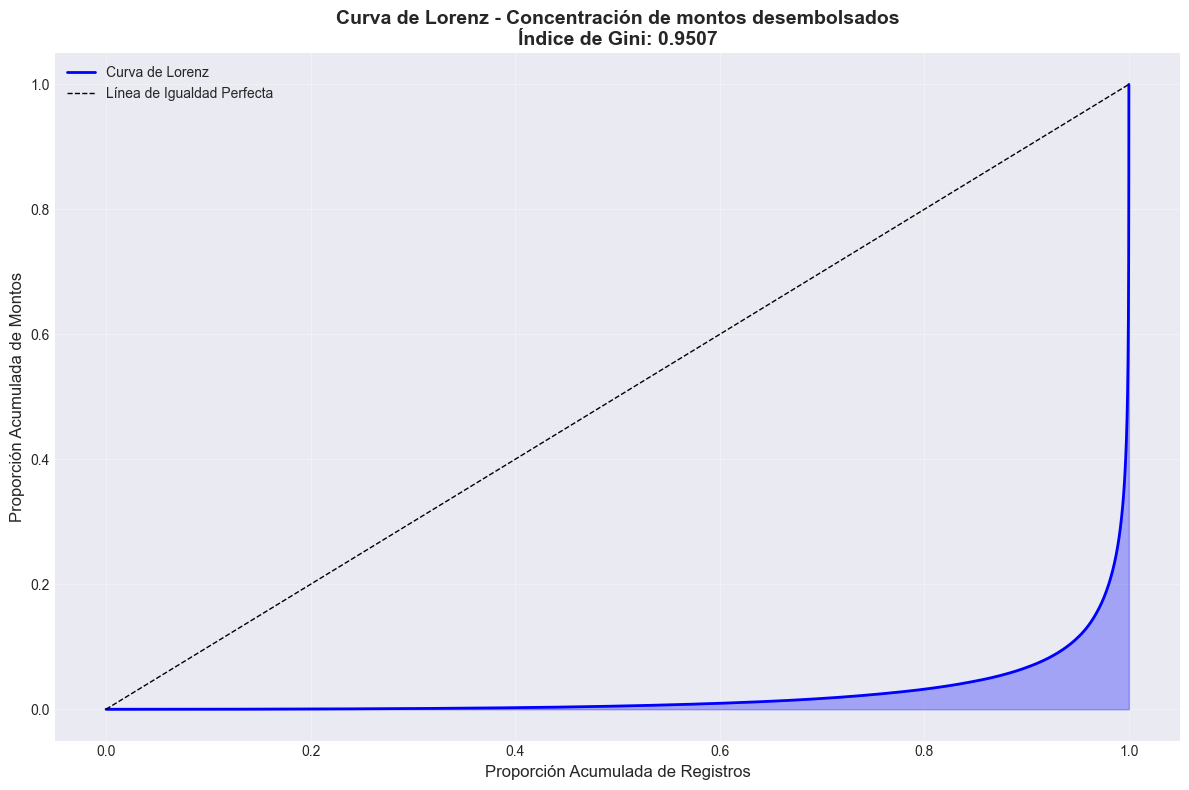


 Índice de Gini: 0.9507
   Interpretación: Alta concentración


In [39]:
# Curva de Lorenz para concentración de montos desembolsados
if 'Montos_desembolsados' in df.columns:
    print("\n ANÁLISIS DE CONCENTRACIÓN: Montos Desembolsados:")
    print("="*100)
    
    # Ordenar y calcular acumulados
    montos_ordenados = df['Montos_desembolsados'].sort_values().values
    montos_acumulados = np.cumsum(montos_ordenados)
    montos_acumulados_pct = montos_acumulados / montos_acumulados[-1]
    
    n = len(montos_ordenados)
    x = np.arange(1, n+1) / n
    
    # Calcular índice de Gini
    gini = 1 - 2 * np.trapezoid(montos_acumulados_pct, x)
    
    plt.figure(figsize=(12, 8))
    plt.plot(x, montos_acumulados_pct, linewidth=2, label='Curva de Lorenz', color='blue')
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Línea de Igualdad Perfecta')
    plt.fill_between(x, montos_acumulados_pct, alpha=0.3, color='blue')
    plt.xlabel('Proporción Acumulada de Registros', fontsize=12)
    plt.ylabel('Proporción Acumulada de Montos', fontsize=12)
    plt.title(f'Curva de Lorenz - Concentración de montos desembolsados\nÍndice de Gini: {gini:.4f}', 
             fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\n Índice de Gini: {gini:.4f}")
    print(f"   Interpretación: {'Alta concentración' if gini > 0.5 else 'Concentración moderada' if gini > 0.3 else 'Baja concentración'}")

---

##  ANÁLISIS ESTADÍSTICO AVANZADO

### Tests de Normalidad

In [40]:
# Test de normalidad para variables numéricas
print("\n TESTS DE NORMALIDAD (D'Agostino-Pearson):")
print("="*100)

resultados_normalidad = []

for col in columnas_numericas_analisis:
    datos = df[col].dropna()
    
    if len(datos) > 20:  # Mínimo de observaciones para el test
        stat, p_value = normaltest(datos)
        
        resultados_normalidad.append({
            'Variable': col,
            'Estadístico': stat,
            'p-value': p_value,
            'Distribución_Normal': 'Sí' if p_value > 0.05 else 'No'
        })

df_normalidad = pd.DataFrame(resultados_normalidad)
print(df_normalidad)

print("\n Interpretación:")
print("   - p-value > 0.05: Los datos siguen aproximadamente una distribución normal")
print("   - p-value ≤ 0.05: Los datos NO siguen una distribución normal")


 TESTS DE NORMALIDAD (D'Agostino-Pearson):
                           Variable  Estadístico  p-value Distribución_Normal
0  Tasa_efectiva_promedio_ponderada   1568041.63     0.00                  No
1                  margen_adicional  16104239.91     0.00                  No
2              Montos_desembolsados  72480316.70     0.00                  No
3  Numero_de_creditos_desembolsados  72216211.08     0.00                  No

 Interpretación:
   - p-value > 0.05: Los datos siguen aproximadamente una distribución normal
   - p-value ≤ 0.05: Los datos NO siguen una distribución normal


### ANOVA: Comparación de Medias entre Grupos

In [41]:
# ANOVA: Comparar tasas de interés entre diferentes grupos
if all(col in df.columns for col in ['Sexo', 'Tasa_efectiva_promedio_ponderada']):
    print("\n ANÁLISIS ANOVA: ¿Existen diferencias significativas en tasas por Sexo?")
    print("="*100)
    
    # Filtrar solo personas naturales
    df_personas_naturales = df[df['Sexo'].isin(['Masculino', 'Femenino'])]
    grupos_sexo = [df_personas_naturales[df_personas_naturales['Sexo'] == sexo]['Tasa_efectiva_promedio_ponderada'].dropna() 
                for sexo in ['Masculino', 'Femenino']]
    
    if len(grupos_sexo) >= 2:
        f_stat, p_value = f_oneway(*grupos_sexo)
        
        print(f"\nEstadístico F: {f_stat:.4f}")
        print(f"p-value: {p_value:.6f}")
        
        if p_value < 0.05:
            print(f"\n Conclusión: Existen diferencias significativas en las tasas de interés entre sexos (p < 0.05)")
            print("   Esto sugiere que el sexo es un factor relevante en las tasas ofrecidas.")
        else:
            print(f"\n Conclusión: NO existen diferencias significativas en las tasas de interés entre sexos (p >= 0.05)")
            print("   Las tasas no varían significativamente por sexo.")


 ANÁLISIS ANOVA: ¿Existen diferencias significativas en tasas por Sexo?

Estadístico F: 27605.8696
p-value: 0.000000

 Conclusión: Existen diferencias significativas en las tasas de interés entre sexos (p < 0.05)
   Esto sugiere que el sexo es un factor relevante en las tasas ofrecidas.


In [42]:
# ANOVA: Comparar tasas por tipo de persona
if all(col in df.columns for col in ['Tipo_de_persona', 'Tasa_efectiva_promedio_ponderada']):
    print("\n ANÁLISIS ANOVA: ¿Existen diferencias significativas en tasas por Tipo de Persona?")
    print("="*100)
    
    grupos_persona = [df[df['Tipo_de_persona'] == tipo]['Tasa_efectiva_promedio_ponderada'].dropna() 
                      for tipo in df['Tipo_de_persona'].unique() if tipo != 'nan']
    
    if len(grupos_persona) >= 2:
        f_stat, p_value = f_oneway(*grupos_persona)
        
        print(f"\nEstadístico F: {f_stat:.4f}")
        print(f"p-value: {p_value:.6f}")
        
        if p_value < 0.05:
            print(f"\n Existen diferencias significativas en las tasas entre personas naturales y jurídicas (p < 0.05)")
        else:
            print(f"\n No existen diferencias significativas en las tasas por tipo de persona (p >= 0.05)")


 ANÁLISIS ANOVA: ¿Existen diferencias significativas en tasas por Tipo de Persona?

Estadístico F: 496515.5324
p-value: 0.000000

 Existen diferencias significativas en las tasas entre personas naturales y jurídicas (p < 0.05)


---

##  HALLAZGOS CLAVE Y CONCLUSIONES

### Resumen de Insights

In [43]:
# Generar resumen de hallazgos clave
print("\n" + "="*100)
print(" RESUMEN DE INSIGHTS")
print("="*100)

print("\n 1. CARACTERÍSTICAS DEL DATASET:")
print(f"   - Total de registros: {len(df):,}")
print(f"   - Periodo analizado: {df['Fecha_Corte'].min().strftime('%Y-%m-%d') if 'Fecha_Corte' in df.columns else 'N/A'} a {df['Fecha_Corte'].max().strftime('%Y-%m-%d') if 'Fecha_Corte' in df.columns else 'N/A'}")
print(f"   - Número de entidades financieras: {df['Nombre_Entidad'].nunique() if 'Nombre_Entidad' in df.columns else 'N/A'}")
print(f"   - Tipos de crédito diferentes: {df['Tipo_de_credito'].nunique() if 'Tipo_de_credito' in df.columns else 'N/A'}")

if 'Tasa_efectiva_promedio_ponderada' in df.columns:
    print("\n 2. ANÁLISIS DE TASAS DE INTERÉS:")
    print(f"   - Tasa promedio general: {df['Tasa_efectiva_promedio_ponderada'].mean():.2f}%")
    print(f"   - Tasa mediana: {df['Tasa_efectiva_promedio_ponderada'].median():.2f}%")
    print(f"   - Rango de tasas: {df['Tasa_efectiva_promedio_ponderada'].min():.2f}% - {df['Tasa_efectiva_promedio_ponderada'].max():.2f}%")
    print(f"   - Desviación estándar: {df['Tasa_efectiva_promedio_ponderada'].std():.2f}%")

if 'Montos_desembolsados' in df.columns:
    print("\n 3. ANÁLISIS DE MONTOS:")
    print(f"   - Monto total desembolsado: ${df['Montos_desembolsados'].sum():,.0f}")
    print(f"   - Monto promedio por operación: ${df['Montos_desembolsados'].mean():,.0f}")
    print(f"   - Monto mediano: ${df['Montos_desembolsados'].median():,.0f}")

print("\n 4. SEGMENTACIÓN:")
if 'Tipo_de_persona' in df.columns:
    print("   - Distribución por tipo de persona:")
    for tipo, count in df['Tipo_de_persona'].value_counts().items():
        print(f"     • {tipo}: {count:,} ({count/len(df)*100:.1f}%)")

if 'Sexo' in df.columns:
    print("   - Distribución por sexo:")
    for sexo, count in df['Sexo'].value_counts().items():
        print(f"     • {sexo}: {count:,} ({count/len(df)*100:.1f}%)")


 RESUMEN DE INSIGHTS

 1. CARACTERÍSTICAS DEL DATASET:
   - Total de registros: 13,175,571
   - Periodo analizado: 2022-07-01 a 2025-08-29
   - Número de entidades financieras: 52
   - Tipos de crédito diferentes: 8

 2. ANÁLISIS DE TASAS DE INTERÉS:
   - Tasa promedio general: 20.24%
   - Tasa mediana: 24.89%
   - Rango de tasas: 0.00% - 88.90%
   - Desviación estándar: 13.95%

 3. ANÁLISIS DE MONTOS:
   - Monto total desembolsado: $432,826,406,263,729
   - Monto promedio por operación: $32,850,675
   - Monto mediano: $1,100,000

 4. SEGMENTACIÓN:
   - Distribución por tipo de persona:
     • Natural: 10,314,442 (78.3%)
     • Jurídica: 2,861,129 (21.7%)
   - Distribución por sexo:
     • Masculino: 5,526,356 (41.9%)
     • Femenino: 4,787,639 (36.3%)
     • No aplica: 2,861,129 (21.7%)
     • No binario: 238 (0.0%)
     • Trans: 209 (0.0%)


---